In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('test_data_pwm100_26_11_2019_16_31_38.csv')
df = df.drop(df.columns[0], axis=1)

In [56]:
df.head()

,time,left_pwm,right_pwm,left_pressure,right_pressure,left_flex,right_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y
0,0.000000,0.0,0.0,100.0,0.0,541.0,0.0,565.976854,94.629726,571.475267,225.405826
1,0.019897,0.0,0.0,101.0,0.0,542.0,0.0,565.976854,94.629726,571.475267,225.405826
2,0.049927,0.0,0.0,101.0,0.0,541.0,0.0,565.723762,94.955944,571.498437,225.410322
3,0.079956,0.0,0.0,101.0,0.0,541.0,0.0,564.268318,94.861257,570.843264,225.535036
4,0.099976,0.0,0.0,101.0,0.0,541.0,0.0,564.266958,94.931247,570.812615,225.497213


In [57]:
df.describe()

,time,left_pwm,right_pwm,left_pressure,right_pressure,left_flex,right_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y
count,4647.000000,4647.000000,4647.0,4647.000000,4647.0,4647.000000,4647.0,4647.000000,4647.000000,4647.000000,4647.000000
mean,62.725056,68.947708,0.0,148.866796,0.0,434.994835,0.0,565.640552,95.353283,619.828050,207.904093
std,36.162951,78.268435,0.0,45.947889,0.0,122.403664,0.0,0.544311,0.543821,44.147889,27.147222
min,0.000000,0.000000,0.0,99.000000,0.0,274.000000,0.0,564.125496,94.090610,570.581904,141.935684
25%,31.564941,0.000000,0.0,101.000000,0.0,312.000000,0.0,565.302215,94.946505,572.337084,188.407399
50%,62.619995,0.000000,0.0,149.000000,0.0,400.000000,0.0,565.695026,95.331707,623.081734,225.548817
75%,94.139954,140.000000,0.0,193.000000,0.0,566.000000,0.0,566.031207,95.718260,667.251115,227.309420
max,125.239990,200.000000,0.0,231.000000,0.0,596.000000,0.0,567.259874,97.203371,679.555309,231.844302


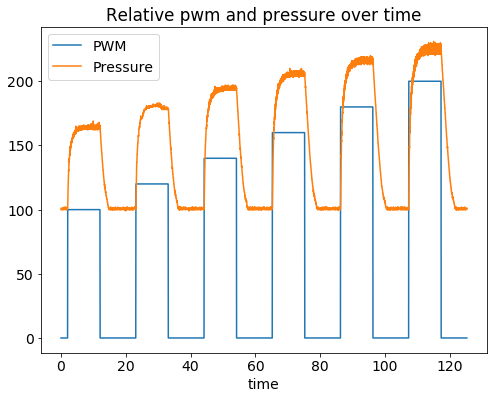

In [58]:
font = {'size': 14}

plt.rc('font', **font)

plt.figure(figsize=(8, 6))
plt.plot(df['time'], df['left_pwm'])
plt.plot(df['time'], df['left_pressure'])
plt.legend(['PWM', 'Pressure'])
plt.xlabel('time')
plt.title('Relative pwm and pressure over time');
plt.savefig('pwm_pressure_200.png')

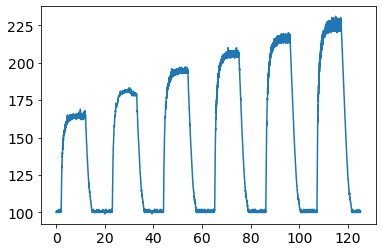

In [59]:
plt.plot(df['time'], df['left_pressure'])

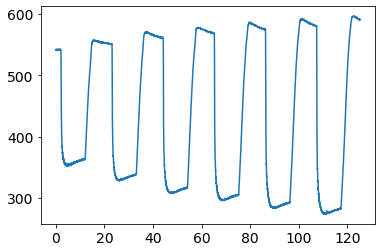

In [60]:
plt.plot(df['time'], df['left_flex'])

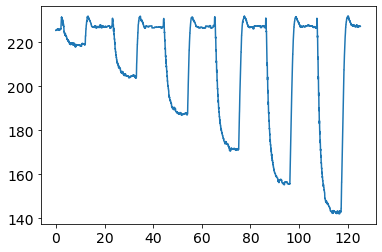

In [61]:
plt.plot(df['time'], df['tip_pos_y'])

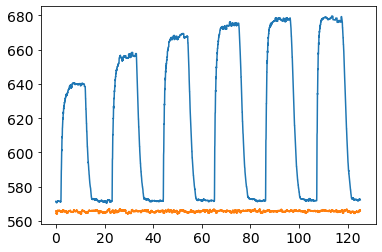

In [62]:
plt.plot(df['time'], df['tip_pos_x'])
plt.plot(df['time'], df['base_pos_x'])

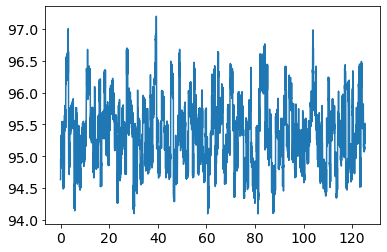

In [63]:
plt.plot(df['time'], df['base_pos_y'])

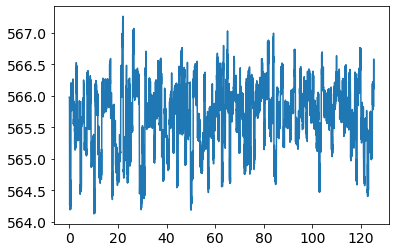

In [64]:
plt.plot(df['time'], df['base_pos_x'])

In [65]:
pwm20a = pd.read_csv('test_data_pwm20_26_11_2019_16_47_47.csv')
pwm20b = pd.read_csv('test_data_pwm20_26_11_2019_16_48_08.csv')
pwm40a = pd.read_csv('test_data_pwm40_26_11_2019_16_48_29.csv')
pwm40b = pd.read_csv('test_data_pwm40_26_11_2019_16_48_50.csv')
pwm60a = pd.read_csv('test_data_pwm60_26_11_2019_16_49_11.csv')
pwm60b = pd.read_csv('test_data_pwm60_26_11_2019_16_49_32.csv')
pwm80a = pd.read_csv('test_data_pwm80_26_11_2019_16_49_53.csv')
pwm80b = pd.read_csv('test_data_pwm80_26_11_2019_16_50_14.csv')
pwm100a = pd.read_csv('test_data_pwm100_26_11_2019_16_31_38.csv')
pwm100b = pd.read_csv('test_data_pwm100_26_11_2019_16_44_54.csv')
pwm120a = pd.read_csv('test_data_pwm120_26_11_2019_16_31_59.csv')
pwm120b = pd.read_csv('test_data_pwm120_26_11_2019_16_45_16.csv')
pwm140a = pd.read_csv('test_data_pwm140_26_11_2019_16_32_20.csv')
pwm140b = pd.read_csv('test_data_pwm140_26_11_2019_16_45_37.csv')
pwm160a = pd.read_csv('test_data_pwm160_26_11_2019_16_32_41.csv')
pwm160b = pd.read_csv('test_data_pwm160_26_11_2019_16_45_58.csv')
pwm180a = pd.read_csv('test_data_pwm180_26_11_2019_16_33_02.csv')
pwm180b = pd.read_csv('test_data_pwm180_26_11_2019_16_46_19.csv')
pwm200a = pd.read_csv('test_data_pwm200_26_11_2019_16_33_23.csv')
pwm200b = pd.read_csv('test_data_pwm200_26_11_2019_16_46_40.csv')

In [66]:
pwm20a.head()

,Unnamed: 0,time,left_pwm,right_pwm,left_pressure,right_pressure,left_flex,right_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y
0,0,0.000000,0.0,0.0,101.0,0.0,564.0,0.0,566.507259,95.714436,571.490813,227.655494
1,1,0.030029,0.0,0.0,100.0,0.0,564.0,0.0,566.073778,95.694150,571.447331,227.706402
2,2,0.060059,0.0,0.0,101.0,0.0,563.0,0.0,566.153779,95.734757,571.440535,227.746289
3,3,0.080078,0.0,0.0,101.0,0.0,563.0,0.0,566.219685,95.704893,571.462113,227.679286
4,4,0.110107,0.0,0.0,101.0,0.0,565.0,0.0,566.483402,95.730607,571.389647,227.702484


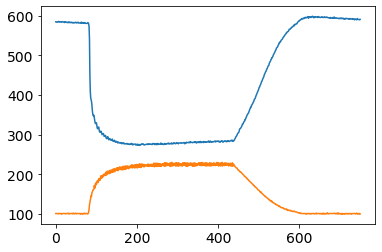

In [67]:
plt.plot(pwm200b['left_flex'])
plt.plot(pwm200b['left_pressure'])

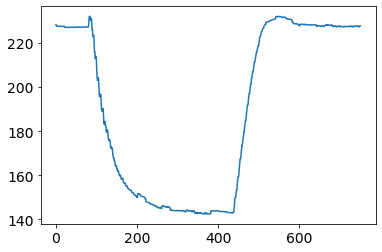

In [68]:
plt.plot(pwm200b['tip_pos_y'])

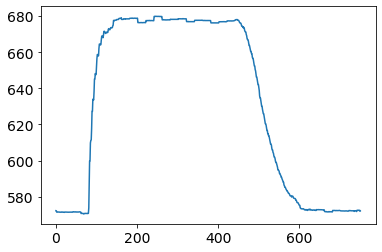

In [69]:
plt.plot(pwm200b['tip_pos_x'])

In [70]:
def theta(base_x, base_y, tip_x, tip_y):
    return np.arcsin((tip_x - base_x) / np.sqrt((tip_y - base_y)**2 + (tip_x - base_x)**2)) * (180 / np.pi)

In [71]:
pwm200b['theta'] = theta(pwm200b['base_pos_x'], pwm200b['base_pos_y'], pwm200b['tip_pos_x'], pwm200b['tip_pos_y'])

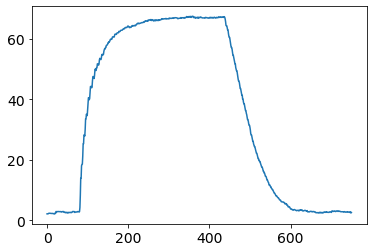

In [72]:
plt.plot(pwm200b['theta'])

In [73]:
beta = (1 / np.dot(pwm200b['left_pressure'], pwm200b['left_pressure'])) * np.dot(pwm200b['left_pressure'], pwm200b['theta'])

In [74]:
beta

0.24458104301921504

In [75]:
mse = np.mean((pwm200b['theta'] - pwm200b['left_pressure'] * .3)**2)

In [76]:
mse

336.42989330360746

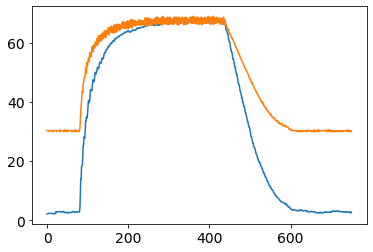

In [77]:
plt.plot(pwm200b['theta'])
plt.plot(pwm200b['left_pressure'] * 0.3)

In [78]:
betas, _, _, _ = np.linalg.lstsq(pwm200b[['left_pressure', 'left_flex']], pwm200b['theta'], rcond=0)

In [79]:
betas

array([ 0.36132571, -0.05811523])

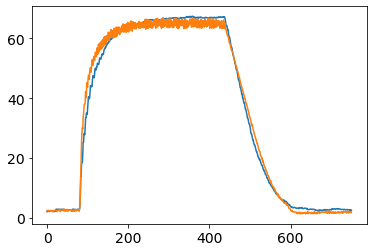

In [80]:
plt.plot(pwm200b['theta'])
plt.plot(pwm200b['left_pressure'] * betas[0] + pwm200b['left_flex'] * betas[1])

In [81]:
np.mean((pwm200b['theta'] - (pwm200b['left_pressure'] * betas[0] + pwm200b['left_flex'] * betas[1]))**2)

5.965483213416939

In [82]:
beta = (1 / np.dot(pwm200b['left_flex'], pwm200b['left_flex'])) * np.dot(pwm200b['left_flex'], pwm200b['theta'])
beta

0.056697415420661125

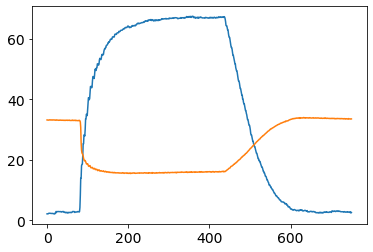

In [83]:
plt.plot(pwm200b['theta'])
plt.plot(pwm200b['left_flex'] * beta)

In [84]:
betas, _, _, _ = np.linalg.lstsq(pwm20b[['left_pressure', 'left_flex']], pwm20b['theta'], rcond=0)
betas

KeyError: 'theta'

In [ ]:
font = {'size': 14}

plt.rc('font', **font)

plt.figure(figsize=(8, 6))

pwm20b['theta'] = theta(pwm20b['base_pos_x'], pwm20b['base_pos_y'], pwm20b['tip_pos_x'], pwm20b['tip_pos_y'])
plt.plot(pwm20b['theta'])
plt.plot(pwm20b['left_pressure'] * betas[0] + pwm20b['left_flex'] * betas[1])
plt.xlabel('time')
plt.ylabel('theta (degrees)')
plt.legend(['actual', 'predicted'])
plt.title('True and Computed Theta at 20 pwm');
plt.savefig('true_est_theta.png');

In [ ]:
pwm_df = pwm20a
pwm_df = pwm_df.append(pwm20b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm40a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm40b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm60a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm60b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm80a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm80b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm100a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm100b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm120a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm120b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm140a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm160a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm160b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm180a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm180b, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm200a, ignore_index=False, sort=False)
pwm_df = pwm_df.append(pwm200b, ignore_index=False, sort=False)

In [ ]:
pwm_df.shape

In [85]:
pwm_df['theta'] = theta(pwm_df['base_pos_x'], pwm_df['base_pos_y'], pwm_df['tip_pos_x'], pwm_df['tip_pos_y'])

In [86]:
betas, _, _, _ = np.linalg.lstsq(pwm_df[['left_pressure', 'left_flex']], pwm_df['theta'], rcond=0)
betas

array([ 0.34494596, -0.0591668 ])

In [87]:
np.mean((pwm_df['theta'] - pwm_df[['left_pressure', 'left_flex']] @ betas )**2)

9.253452173445245

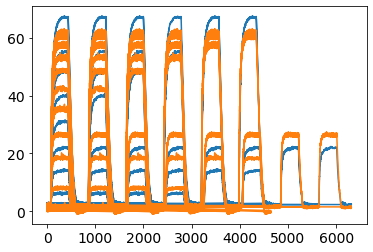

In [88]:
plt.plot(pwm_df['theta'])
plt.plot(pwm_df[['left_pressure', 'left_flex']] @ betas )

In [89]:
betas, _, _, _ = np.linalg.lstsq(pwm_df[['left_flex']], pwm_df['theta'], rcond=0)
betas

array([0.0289242])

In [90]:
np.mean((pwm_df['theta'] - pwm_df['left_flex'] * betas )**2)

613.7162818778917

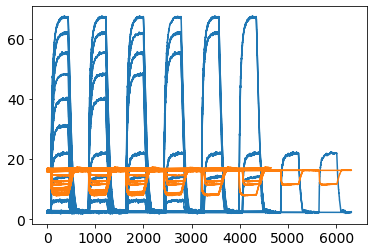

In [91]:
plt.plot(pwm_df['theta'])
plt.plot(pwm_df['left_flex'] * betas)

In [92]:
pwm20a.head()

,Unnamed: 0,time,left_pwm,right_pwm,left_pressure,right_pressure,left_flex,right_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y
0,0,0.000000,0.0,0.0,101.0,0.0,564.0,0.0,566.507259,95.714436,571.490813,227.655494
1,1,0.030029,0.0,0.0,100.0,0.0,564.0,0.0,566.073778,95.694150,571.447331,227.706402
2,2,0.060059,0.0,0.0,101.0,0.0,563.0,0.0,566.153779,95.734757,571.440535,227.746289
3,3,0.080078,0.0,0.0,101.0,0.0,563.0,0.0,566.219685,95.704893,571.462113,227.679286
4,4,0.110107,0.0,0.0,101.0,0.0,565.0,0.0,566.483402,95.730607,571.389647,227.702484


In [93]:
pwm20a_flex = pwm20a[['left_flex']]
pwm20a_flex['theta'] = theta(pwm20a['base_pos_x'], pwm20a['base_pos_y'], pwm20a['tip_pos_x'], pwm20a['tip_pos_y'])

/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
pwm20a_flex['flex^2'] = pwm20a_flex['left_flex'] * pwm20a_flex['left_flex']
pwm20a_flex['flex^3'] = pwm20a_flex['left_flex'] * pwm20a_flex['flex^2']
pwm20a_flex['flex^4'] = pwm20a_flex['flex^2'] * pwm20a_flex['flex^2']
pwm20a_flex['flex^5'] = pwm20a_flex['flex^3'] * pwm20a_flex['flex^2']
pwm20a_flex.head()

/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shershah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,left_flex,theta,flex^2,flex^3,flex^4,flex^5
0,564.0,2.163094,318096.0,179406144.0,1.011851e+11,5.706838e+13
1,564.0,2.330935,318096.0,179406144.0,1.011851e+11,5.706838e+13
2,563.0,2.293338,316969.0,178453547.0,1.004693e+11,5.656424e+13
3,563.0,2.274768,316969.0,178453547.0,1.004693e+11,5.656424e+13
4,565.0,2.129073,319225.0,180362125.0,1.019046e+11,5.757610e+13


In [95]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(pwm20a_flex[['left_flex', 'flex^2', 'flex^3', 'flex^4', 'flex^5']], pwm20a_flex['theta'])

/home/shershah/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1791.9136551212184, tolerance: 26.036379072033576
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
clf.coef_, clf.intercept_

(array([-3.14990607e-01,  4.54526098e-05,  8.85854887e-08,  1.12878423e-10,
         1.49933891e-13]), 129.6423944190123)

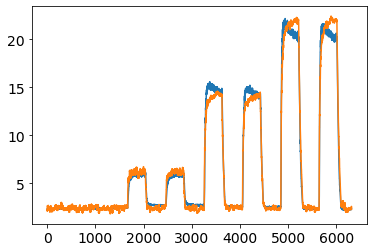

In [97]:
plt.plot(clf.predict(pwm20a_flex[['left_flex', 'flex^2', 'flex^3', 'flex^4', 'flex^5']]))
plt.plot(pwm20a_flex['theta'])

In [98]:
clf.score(pwm20a_flex[['left_flex', 'flex^2', 'flex^3', 'flex^4', 'flex^5']], pwm20a_flex['theta'])

0.9877640023222614

In [99]:
pwm_df.head()

,Unnamed: 0,time,left_pwm,right_pwm,left_pressure,right_pressure,left_flex,right_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y,theta
0,0,0.000000,0.0,0.0,101.0,0.0,564.0,0.0,566.507259,95.714436,571.490813,227.655494,2.163094
1,1,0.030029,0.0,0.0,100.0,0.0,564.0,0.0,566.073778,95.694150,571.447331,227.706402,2.330935
2,2,0.060059,0.0,0.0,101.0,0.0,563.0,0.0,566.153779,95.734757,571.440535,227.746289,2.293338
3,3,0.080078,0.0,0.0,101.0,0.0,563.0,0.0,566.219685,95.704893,571.462113,227.679286,2.274768
4,4,0.110107,0.0,0.0,101.0,0.0,565.0,0.0,566.483402,95.730607,571.389647,227.702484,2.129073


In [100]:
pwm_df_clean = pwm_df.copy()
pwm_df_clean = pwm_df_clean.drop(columns=['Unnamed: 0', 'left_pwm', 'right_pwm', 'left_pressure', 'right_pressure', 'right_flex'])
pwm_df_clean.head()

,time,left_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y,theta
0,0.000000,564.0,566.507259,95.714436,571.490813,227.655494,2.163094
1,0.030029,564.0,566.073778,95.694150,571.447331,227.706402,2.330935
2,0.060059,563.0,566.153779,95.734757,571.440535,227.746289,2.293338
3,0.080078,563.0,566.219685,95.704893,571.462113,227.679286,2.274768
4,0.110107,565.0,566.483402,95.730607,571.389647,227.702484,2.129073


In [101]:
pwm_df_clean['flex^2'] = pwm_df_clean['left_flex'] * pwm_df_clean['left_flex']
pwm_df_clean['flex^3'] = pwm_df_clean['left_flex'] * pwm_df_clean['flex^2']
pwm_df_clean['flex^4'] = pwm_df_clean['flex^2'] * pwm_df_clean['flex^2']
pwm_df_clean['flex^5'] = pwm_df_clean['flex^3'] * pwm_df_clean['flex^2']
pwm_df_clean.head()

,time,left_flex,base_pos_x,base_pos_y,tip_pos_x,tip_pos_y,theta,flex^2,flex^3,flex^4,flex^5
0,0.000000,564.0,566.507259,95.714436,571.490813,227.655494,2.163094,318096.0,179406144.0,1.011851e+11,5.706838e+13
1,0.030029,564.0,566.073778,95.694150,571.447331,227.706402,2.330935,318096.0,179406144.0,1.011851e+11,5.706838e+13
2,0.060059,563.0,566.153779,95.734757,571.440535,227.746289,2.293338,316969.0,178453547.0,1.004693e+11,5.656424e+13
3,0.080078,563.0,566.219685,95.704893,571.462113,227.679286,2.274768,316969.0,178453547.0,1.004693e+11,5.656424e+13
4,0.110107,565.0,566.483402,95.730607,571.389647,227.702484,2.129073,319225.0,180362125.0,1.019046e+11,5.757610e+13


In [102]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(pwm_df_clean[['left_flex', 'flex^2', 'flex^3', 'flex^4', 'flex^5']], pwm_df_clean['theta'])

/home/shershah/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270402.99765761814, tolerance: 2581.5484544761093
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
clf.coef_, clf.intercept_

(array([-6.38054819e-01,  3.12403355e-04,  2.60848968e-07,  1.37113340e-10,
        -1.21209062e-13]), 209.57762998793277)

In [104]:
clf.score(pwm_df_clean[['left_flex', 'flex^2', 'flex^3', 'flex^4', 'flex^5']], pwm_df_clean['theta'])

0.9793363783479785

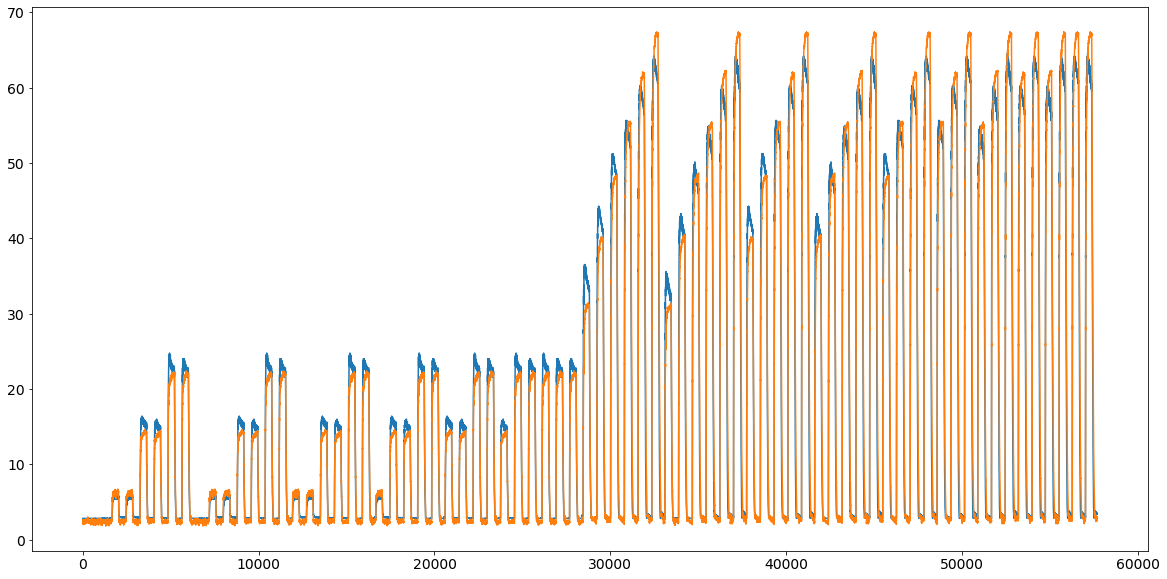

In [105]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(pwm_df_clean)), clf.predict(pwm_df_clean[['left_flex', 'flex^2', 'flex^3', 'flex^4', 'flex^5']]))
plt.plot(range(len(pwm_df_clean)), pwm_df_clean['theta'])

In [113]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(pwm_df_clean[['left_flex', 'flex^2']], pwm_df_clean['theta'])

/home/shershah/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25349.79297337716, tolerance: 2581.5484544761093
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
clf.coef_, clf.intercept_

(array([-8.24310041e-01,  7.28859041e-04]), 235.99238250198368)

In [115]:
clf.score(pwm_df_clean[['left_flex', 'flex^2']], pwm_df_clean['theta'])

0.9800995853838873

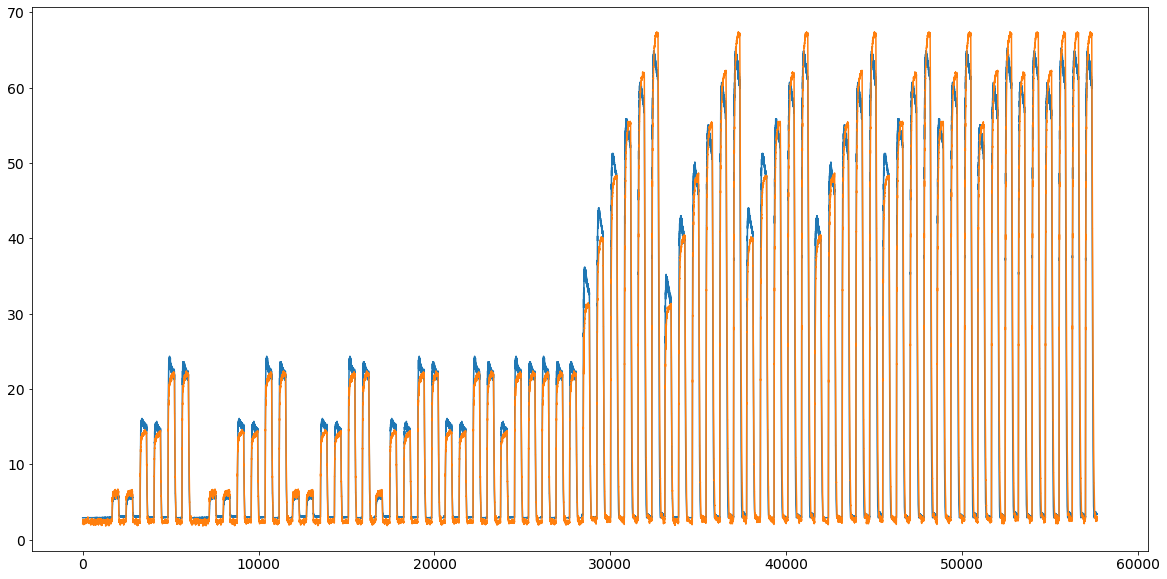

In [116]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(pwm_df_clean)), clf.predict(pwm_df_clean[['left_flex', 'flex^2']]))
plt.plot(range(len(pwm_df_clean)), pwm_df_clean['theta'])